# Bitcoin Transactions: The Building Blocks of the Blockchain

## What is a Bitcoin Transaction?

Think of a Bitcoin transaction like writing a check for digital money. When you write a check, you specify:
- **Where the money comes from** (your account)
- **Where it’s going** (the recipient)
- **How much** is being transferred

Bitcoin transactions work similarly but with added security measures to ensure that only the rightful owner can spend their funds.

## The Anatomy of a Transaction

A Bitcoin transaction has three main parts:
1. Inputs: Previous transactions you're spending from (like your account balance)
2. Outputs: Where the Bitcoin is going (like writing out who gets paid on a check)
3. Amount: How much Bitcoin is being moved

Here’s a simple representation of a transaction:
┌───────────────┐
│   Transaction │
├───────────────┤
│ Inputs        │
│ - Previous TX │
│ - Output Index│
├───────────────┤
│ Outputs       │
│ - Amount      │
│ - Recipient   │
└───────────────┘

## Let's Create a Transaction!

Now, let's write some code to create a simple Bitcoin transaction. This code will demonstrate how to structure a transaction with inputs and outputs.


In [1]:
class TransactionInput:
    def __init__(self, prev_tx_hash, output_index):
        self.prev_tx_hash = prev_tx_hash
        self.output_index = output_index

class TransactionOutput:
    def __init__(self, amount, recipient_address):
        self.amount = amount
        self.recipient_address = recipient_address

class Transaction:
    def __init__(self):
        self.inputs = []
        self.outputs = []
    
    def add_input(self, prev_tx_hash, output_index):
        self.inputs.append(TransactionInput(prev_tx_hash, output_index))
    
    def add_output(self, amount, recipient_address):
        self.outputs.append(TransactionOutput(amount, recipient_address))

In [2]:
# Let's create a transaction
tx = Transaction()
tx.add_input("abc123", 0)  # We're spending from a previous transaction with hash 'abc123', output index 0
tx.add_output(0.5, "1BvBMSEYstWetqTFn5Au4m4GFg7xJaNVN2")  # Sending 0.5 BTC to Bob
tx.add_output(0.4, "1Alice9876543210")  # Our change: 0.4 BTC back to Alice

print("Transaction Inputs (Piggy banks we're breaking):")
for inp in tx.inputs:
    print(f"  Previous Transaction: {inp.prev_tx_hash}, Output Index: {inp.output_index}")

print("\nTransaction Outputs (New piggy banks we're creating):")
for out in tx.outputs:
    print(f"  Amount: {out.amount} BTC, Recipient: {out.recipient_address}")


Transaction Inputs (Piggy banks we're breaking):
  Previous Transaction: abc123, Output Index: 0

Transaction Outputs (New piggy banks we're creating):
  Amount: 0.5 BTC, Recipient: 1BvBMSEYstWetqTFn5Au4m4GFg7xJaNVN2
  Amount: 0.4 BTC, Recipient: 1Alice9876543210


### Key Parts of the Code Explained

1. **TransactionInput Class**: Represents an input in a Bitcoin transaction.
   - **Purpose**: It holds the details of the previous transaction being spent.
   - **Attributes**:
     - `prev_tx_hash`: The hash of the previous transaction.
     - `output_index`: The specific output from that transaction being used.

2. **TransactionOutput Class**: Represents an output in a Bitcoin transaction.
   - **Purpose**: It defines where the Bitcoin is going.
   - **Attributes**:
     - `amount`: The amount of Bitcoin being sent.
     - `recipient_address`: The address of the recipient.

3. **Transaction Class**: Manages the entire transaction.
   - **Purpose**: It collects inputs and outputs to form a complete transaction.
   - **Methods**:
     - `add_input()`: Adds an input to the transaction.
     - `add_output()`: Adds an output to the transaction.

## Signing the Transaction

In the real world, you sign a check to authorize it. In Bitcoin, we use a digital signature. It's like a super secure, unforgeable signature that proves you have the right to spend from those inputs.

Let’s see how we can generate a key pair and sign our transaction.

In [3]:
import hashlib
import ecdsa
import os

def generate_keypair():
    """Generate a new ECDSA key pair."""
    sk = ecdsa.SigningKey.generate(curve=ecdsa.SECP256k1)
    vk = sk.get_verifying_key()
    return sk.to_string().hex(), vk.to_string().hex()

def sign_transaction(transaction, private_key):
    # In reality, we would serialize the entire transaction
    # Here, we're just hashing a string representation for simplicity
    tx_hash = hashlib.sha256(str(transaction.__dict__).encode()).hexdigest()
    
    sk = ecdsa.SigningKey.from_string(bytes.fromhex(private_key), curve=ecdsa.SECP256k1)
    signature = sk.sign(tx_hash.encode())
    
    return signature.hex()

# Generate a proper key pair
private_key, public_key = generate_keypair()

# Sign our transaction
signature = sign_transaction(tx, private_key)
print(f"Private Key: {private_key}")
print(f"Public Key: {public_key}")
print(f"\nTransaction Signature: {signature[:64]}...")  # Showing first 64 chars for brevity

Private Key: e414c5449d940c84c2ef64252509ed4e09f8178c0354ce6ab572c0ed38f5d078
Public Key: 0b8f55f55ccc1721c172ff2b4aa7ddb221a91d5e6e2cc90058be3fd5d077bd51183e32c148ebb739184031219ce15196d5c1c4fa56590148d98978532a416a37

Transaction Signature: 9d8ed4446ef1380677f662186d7bbb1bc36c26979eac8481491fed57881e3828...


### Key Parts of the Signing Code Explained

1. **generate_keypair()**: 
   - **Purpose**: Generates a new ECDSA (Elliptic Curve Digital Signature Algorithm) key pair.
   - **Returns**: A private key (used for signing) and a public key (used for verification).

2. **sign_transaction(transaction, private_key)**:
   - **Purpose**: Signs the transaction using the private key.
   - **Process**:
     - It creates a hash of the transaction using SHA-256.
     - It uses the private key to generate a digital signature for that hash.
   - **Returns**: The digital signature in hexadecimal format.

This process ensures that only the owner of the private key can authorize the transaction, providing security and authenticity.

## Verifying Transactions

Just as a bank verifies your signature on a check, the Bitcoin network needs to verify the digital signature on a transaction. Here's how it works:

In [4]:
def verify_signature(transaction, signature, public_key):
    tx_hash = hashlib.sha256(str(transaction.__dict__).encode()).hexdigest()
    
    vk = ecdsa.VerifyingKey.from_string(bytes.fromhex(public_key), curve=ecdsa.SECP256k1)
    try:
        return vk.verify(bytes.fromhex(signature), tx_hash.encode())
    except:
        return False

In [5]:
# Let's verify our transaction
is_valid = verify_signature(tx, signature, public_key)
print(f"Is the signature valid? {is_valid}")

Is the signature valid? True


### Key Parts of the Verification Code Explained

1. **verify_signature(transaction, signature, public_key)**:
   - **Purpose**: Verifies the digital signature of a transaction.
   - **Process**:
     - It creates a hash of the transaction using SHA-256.
     - It uses the public key to check if the signature matches the hash.
   - **Returns**: A boolean indicating whether the signature is valid.

This verification process ensures that the transaction is legitimate and that the person spending the Bitcoin is authorized to do so.

## Visualizing the Transaction

Let's visualize our transaction to better understand its structure. This will help illustrate how inputs and outputs are connected.

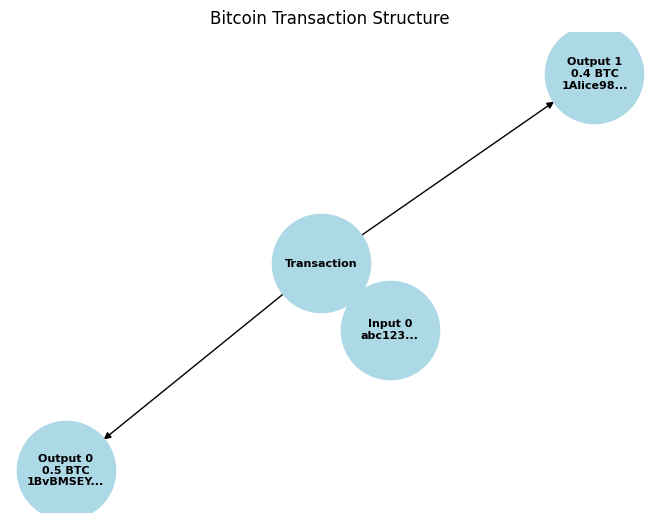

In [6]:
import matplotlib.pyplot as plt
import networkx as nx

def visualize_transaction(transaction):
    G = nx.DiGraph()
    for i, inp in enumerate(transaction.inputs):
        G.add_edge(f"Input {i}\n{inp.prev_tx_hash[:8]}...", "Transaction")
    for i, out in enumerate(transaction.outputs):
        G.add_edge("Transaction", f"Output {i}\n{out.amount} BTC\n{out.recipient_address[:8]}...")
    
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_color='lightblue', 
            node_size=5000, font_size=8, font_weight='bold')
    
    plt.title("Bitcoin Transaction Structure")
    plt.axis('off')
    plt.show()

visualize_transaction(tx)

## What Did We Learn?

1. **A Bitcoin transaction is like a digital check**: It specifies where the money comes from and where it’s going.

2. **Inputs reference previous transactions**: They show where the Bitcoin is coming from.

3. **Outputs specify where the Bitcoin is going**: They indicate the amount and recipient.

4. **We sign transactions to prove ownership**: This is similar to signing a check.

5. **The network verifies signatures**: Ensuring the transaction is legitimate.

6. **ECDSA provides security**: It allows you to prove it’s you without revealing your private key.

7. **Transactions can have multiple inputs and outputs**: This allows for complex money movements, but at its core, it’s about securely transferring value.


## Quick Check: Did You Get It?

Let’s see if you caught the main ideas about Bitcoin transactions:

1. What are the three main parts of a Bitcoin transaction? (Hint: Think of a check)

2. What is the purpose of a digital signature in Bitcoin? (Hint: It’s like signing a check)

3. What do we call the previous transactions that inputs reference? (Hint: They show where the Bitcoin is coming from)

Think about your answers, then check below!

<details>
<summary>Click to see the answers</summary>

1. Inputs, Outputs, and Amount.
2. To prove ownership and authorize the transaction.
3. Previous transactions.

Congratulations on completing the transactions chapter!